In [1]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
file_path = '/content/drive/MyDrive/SM technology task/datasets/'
df=pd.read_csv(file_path+'train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23473 entries, 0 to 23472
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             23473 non-null  object
 1   feedback_text  23473 non-null  object
 2   toxic          23473 non-null  int64 
 3   abusive        23473 non-null  int64 
 4   vulgar         23473 non-null  int64 
 5   menace         23473 non-null  int64 
 6   offense        23473 non-null  int64 
 7   bigotry        23473 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ MB


In [34]:
df.head()

,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0


Step 1: EDA
- Label Distribution  
We'll visualize how each toxicity label is distributed.
- Sentence Structure

  - Comment length (number of characters & words)

  - Word frequency

- Missing Values and Outliers

<ipython-input-5-0ddafb379bdf>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, ax=axs[0, 0], palette="viridis")


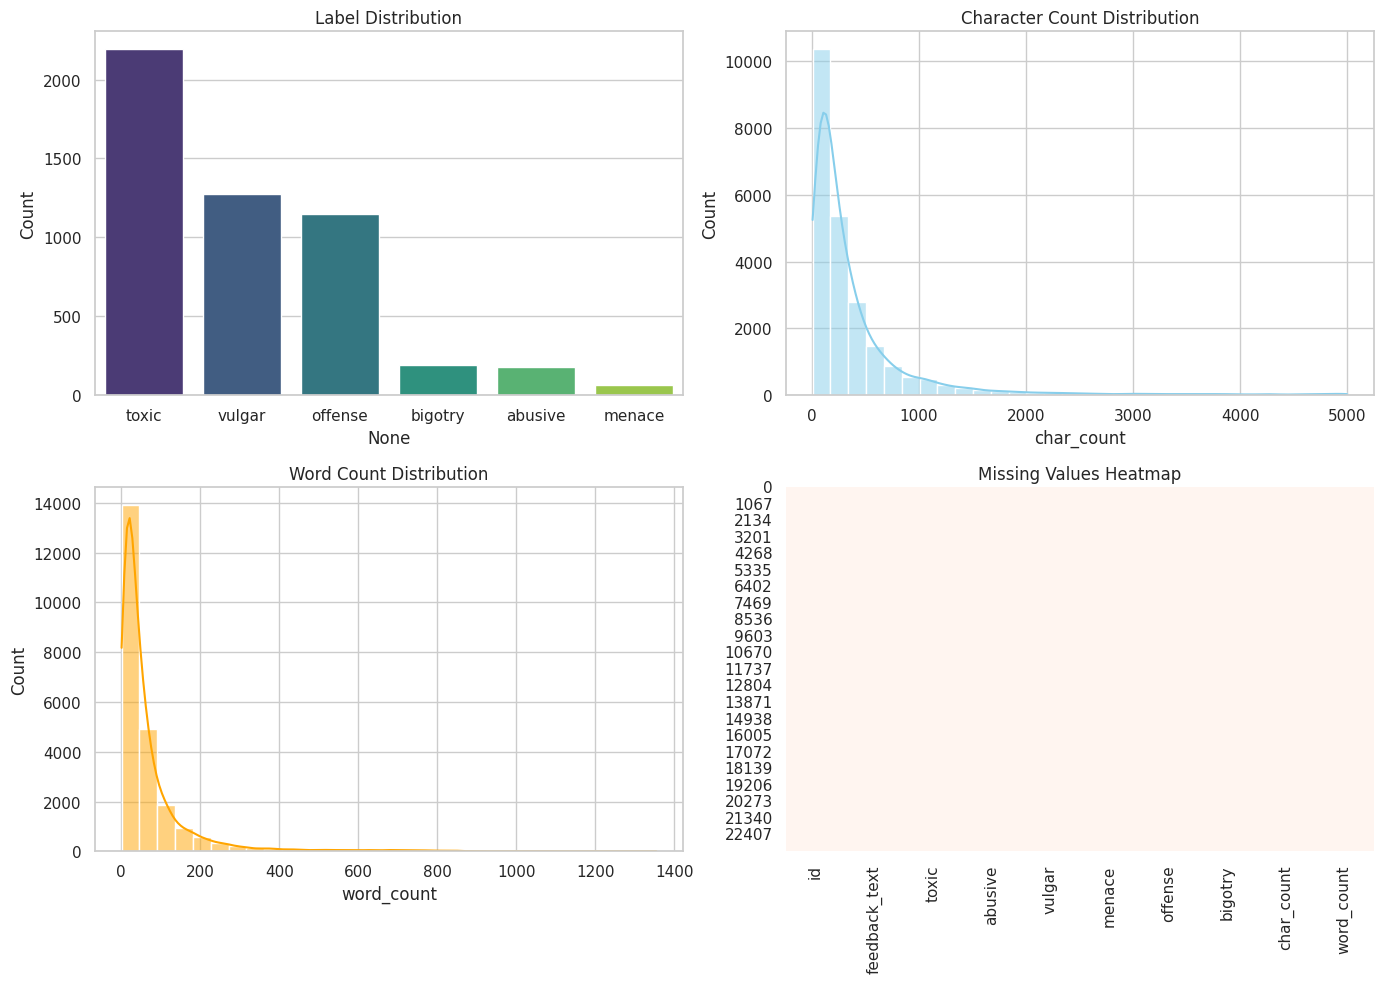

,0
id,0
feedback_text,0
toxic,0
abusive,0
vulgar,0
menace,0
offense,0
bigotry,0
char_count,0
word_count,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set(style="whitegrid")

# 1.1 Label Distribution
label_cols = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']
label_counts = df[label_cols].sum().sort_values(ascending=False)

# 1.2 Sentence Structure
df['char_count'] = df['feedback_text'].apply(len)
df['word_count'] = df['feedback_text'].apply(lambda x: len(str(x).split()))

# 1.3 Check for missing values
missing_values = df.isnull().sum()

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Label distribution
sns.barplot(x=label_counts.index, y=label_counts.values, ax=axs[0, 0], palette="viridis")
axs[0, 0].set_title("Label Distribution")
axs[0, 0].set_ylabel("Count")

# Character count distribution
sns.histplot(df['char_count'], bins=30, kde=True, ax=axs[0, 1], color="skyblue")
axs[0, 1].set_title("Character Count Distribution")

# Word count distribution
sns.histplot(df['word_count'], bins=30, kde=True, ax=axs[1, 0], color="orange")
axs[1, 0].set_title("Word Count Distribution")

# Heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap="Reds", ax=axs[1, 1])
axs[1, 1].set_title("Missing Values Heatmap")

plt.tight_layout()
plt.show()

missing_values

✅ EDA Summary

1. Label Distribution

  - Most common label: toxic

  - Least common: menace, bigotry

2. Sentence Structure

    - Sentence length varies widely.

    - Most comments have around 10–50 words.

    - Some outliers exist (very short or very long comments).

3. Missing Values

    - No missing values in the dataset—clean data to work with.

we'll move on to Step 2: Text Preprocessing:

    1. Tokenization

    2. Lowercasing

    3. Remove stopwords, punctuation, and special characters

    4. Stemming/Lemmatization

    5. TF-IDF Vectorization

In [ ]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation/special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [ ]:
# Apply preprocessing in train dataset
df['cleaned_text'] = df['feedback_text'].astype(str).apply(preprocess_text)

In [ ]:
df = df[df['cleaned_text'].str.strip() != ''] # remove empty string

In [ ]:
df.to_csv('cleaned_train.csv', index=False)

# validation and Test dataset Preprocessing
- required for baseline and advance model  
- is not required for transformer because transformer already trained for multilingual understanding

In [ ]:
valid_df=pd.read_csv(file_path+'validation.csv')
test_df=pd.read_csv(file_path+'test.csv')


In [ ]:
# test_df.head()
valid_df.head()


,id,feedback_text,lang,toxic
0,1203,İyi tamam olabilir. Balkanlar maddesini gelişt...,tr,0
1,5871,"Por dios, y la canción de John Lennon: http://...",es,1
2,3590,Selam. Öncelikle tebrik ederim... Bu arada ken...,tr,0
3,447,Leggiti tutte le discussioni. Magari cancellal...,it,1
4,6634,A LAS TOKITAS NOS VALE QUE LAS JONATICAS INSUL...,es,1


multiligual validation data

In [ ]:
print( valid_df.shape )
print( test_df.shape )

(840, 4)
(6700, 3)


In [ ]:
print("validation: ", valid_df['lang'].value_counts().index )
print("test: ", test_df['lang'].value_counts().index )

validation:  Index(['tr', 'es', 'it'], dtype='object', name='lang')
test:  Index(['tr', 'ru', 'pt', 'fr', 'it', 'es'], dtype='object', name='lang')


Translate content into English

In [ ]:
!pip install deep-translator

In [ ]:
from deep_translator import GoogleTranslator

def translate_to_english(text, src_lang):
    try:
        return GoogleTranslator(source=src_lang, target='en').translate(text)
    except:
        return text  # fallback to original

In [ ]:
valid_df['text'] = valid_df.apply(lambda row: translate_to_english(row['feedback_text'], row['lang']), axis=1)

In [ ]:
valid_df.to_csv('cleaned_validation.csv', index=False)

In [ ]:
test_df['text'] = test_df.apply(lambda row: translate_to_english(row['content'], row['lang']), axis=1)

In [ ]:
test_df.to_csv('cleaned_test.csv', index=False)

In [ ]:
print(pd.read_csv('cleaned_test.csv').shape)
print(test_df.shape)

(6700, 4)
(6700, 4)
